<a href="https://colab.research.google.com/github/dannnn30/data-mining-_-daniel/blob/main/Week_7_Responsi_Daniel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Daniel Yohanis Oematan - 0706022210060**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [5]:
#Import Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from mpl_toolkits.mplot3d import Axes3D

## Load Dataset

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/dannnn30/data-mining-_-daniel/refs/heads/main/bank.csv", sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [7]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [8]:
#describe dataset
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [9]:
col_names = ['job', 'poutcome', 'contact', 'marital']
for col in col_names:
  print(df[col].value_counts(dropna=False))

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64
poutcome
unknown    3705
failure     490
other       197
success     129
Name: count, dtype: int64
contact
cellular     2896
unknown      1324
telephone     301
Name: count, dtype: int64
marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64


In [10]:
#cek null value
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [11]:
for col in df.select_dtypes(include='object').columns:
  df[col] = df[col].replace('unknown', np.nan)

In [12]:
for col in ['job', 'poutcome', 'contact', 'education']:
  df[col] = df[col].fillna(df[col].mode()[0])

In [13]:
df['job'] = df['job'].replace(['admin.', 'management'], 'admin_management')

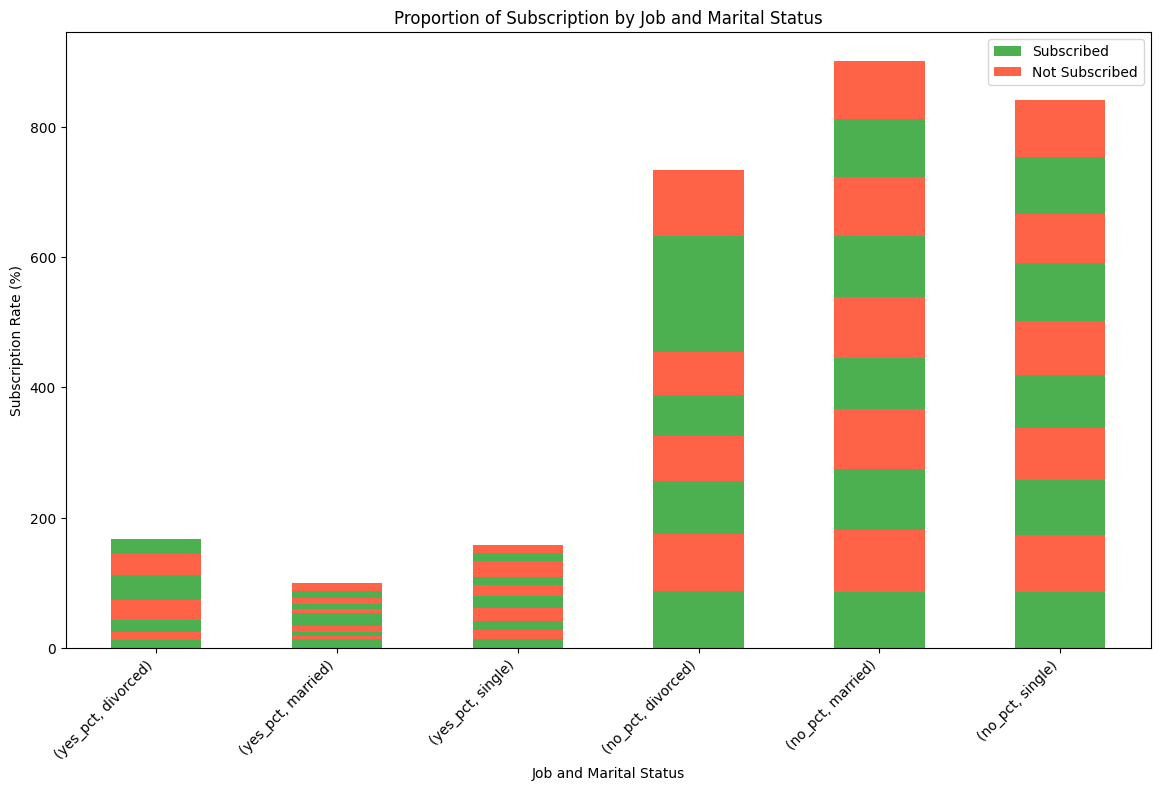

stacked bar plot untuk menunjukkan proporsi pelanggan yang berlangganan berdasarkan kombinasi pekerjaan dan status perkawinan


In [14]:
#visualisasi
subscription_counts = df.groupby(['job', 'marital', 'y']).size().unstack().fillna(0)
subscription_counts['total'] = subscription_counts.sum(axis=1)
subscription_counts['yes_pct'] = subscription_counts['yes'] / subscription_counts['total'] * 100
subscription_counts['no_pct'] = subscription_counts['no'] / subscription_counts['total'] * 100

fig, ax = plt.subplots(figsize=(14, 8))
subscription_counts[['yes_pct', 'no_pct']].unstack().unstack().unstack().plot(kind='bar', stacked=True, color=['#4CAF50', '#FF6347'], ax=ax)
ax.set_title('Proportion of Subscription by Job and Marital Status')
ax.set_xlabel('Job and Marital Status')
ax.set_ylabel('Subscription Rate (%)')
ax.legend(['Subscribed', 'Not Subscribed'])

plt.xticks(rotation=45, ha='right')
plt.show()

print('stacked bar plot untuk menunjukkan proporsi pelanggan yang berlangganan berdasarkan kombinasi pekerjaan dan status perkawinan')

<ipython-input-15-72d1322fd4e7>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


Plot ini menunjukkan hubungan antara durasi kontak pelanggan, saldo akun, dan jumlah kampanye.
Titik-titik yang lebih tinggi pada sumbu Campaign menunjukkan pelanggan yang dihubungi lebih sering.
Pola distribusi dapat membantu melihat apakah durasi yang lebih lama atau saldo yang lebih besar berpengaruh pada frekuensi kampanye.


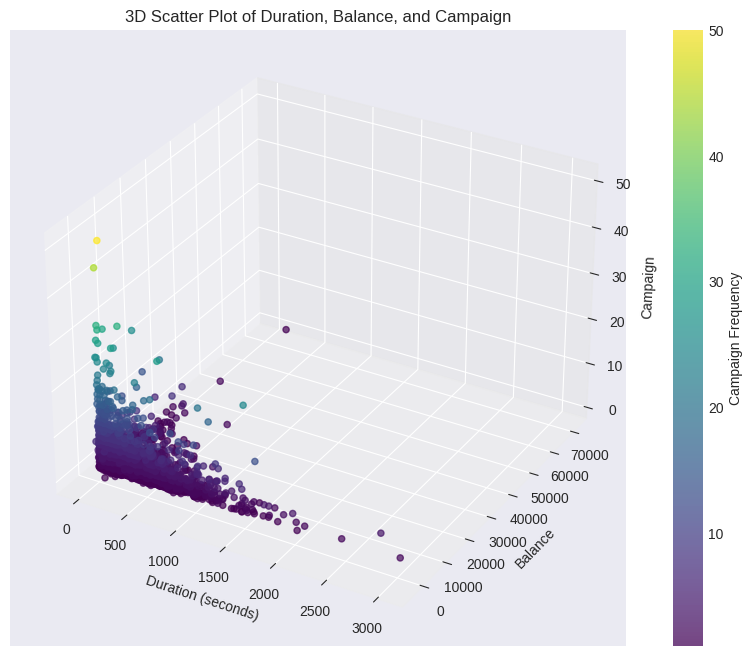

In [15]:
plt.style.use('seaborn-darkgrid')
fig1 = plt.figure(figsize=(12, 8))
ax = fig1.add_subplot(111, projection='3d')
scatter = ax.scatter(df['duration'], df['balance'], df['campaign'], c=df['campaign'], cmap='viridis', alpha=0.7)
ax.set_xlabel('Duration (seconds)')
ax.set_ylabel('Balance')
ax.set_zlabel('Campaign')
fig1.colorbar(scatter, ax=ax, label="Campaign Frequency")
ax.set_title('3D Scatter Plot of Duration, Balance, and Campaign')

print('Plot ini menunjukkan hubungan antara durasi kontak pelanggan, saldo akun, dan jumlah kampanye.\nTitik-titik yang lebih tinggi pada sumbu Campaign menunjukkan pelanggan yang dihubungi lebih sering.\nPola distribusi dapat membantu melihat apakah durasi yang lebih lama atau saldo yang lebih besar berpengaruh pada frekuensi kampanye.')

In [17]:
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,9,1,0,0,1787,0,0,0,19,10,79,1,-1,0,0,0
1,33,6,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,0,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,0,1,2,0,1476,1,1,0,3,6,199,4,-1,0,0,0
4,59,1,1,1,0,0,1,0,0,5,8,226,1,-1,0,0,0


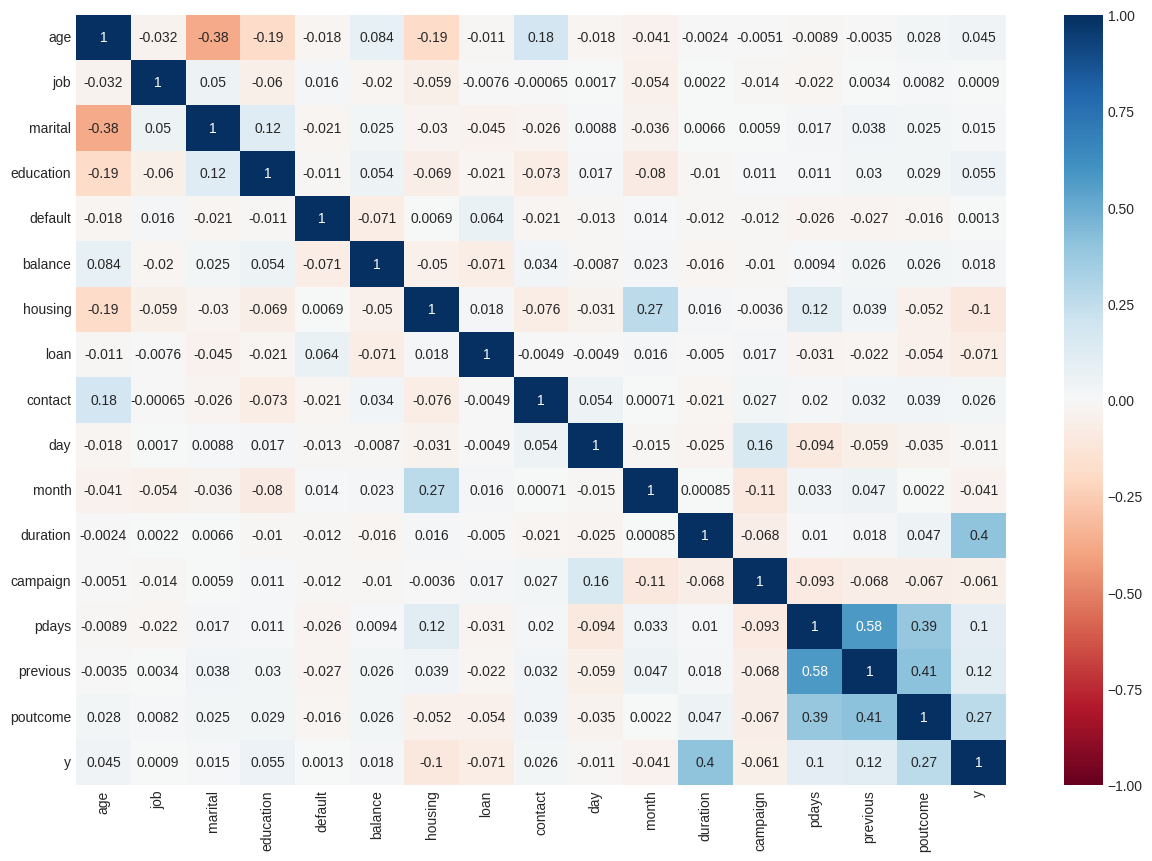

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='RdBu',
vmin=-1, vmax=1, annot=True)
plt.show()

## Machine Learning

In [19]:
#split X dan y
X=df.drop('y',axis=1)
y=df['y']

In [20]:
#train dan test data dengan test size 20% dan random state 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((3616, 16), (905, 16))

## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [31]:
#a. Defining the model
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
#b. Predict the test set results
y_pred = rf_clf.predict(X_test)

In [28]:
#c. Check accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

Accuracy Score: 0.90


In [26]:
#d. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Confusion Matrix:
[[789  18]
 [ 72  26]]


In [27]:
#e. Classification report
cr = classification_report(y_test, y_pred)
print(f"Classification Report:\n{cr}")

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       807
           1       0.59      0.27      0.37        98

    accuracy                           0.90       905
   macro avg       0.75      0.62      0.66       905
weighted avg       0.88      0.90      0.88       905



In [30]:
#f. Results and conclusion
print(f"Accuracy Score: {accuracy:.2f}")
print(f"Confusion Matrix:\n{cm}")
print(f"Classification Report:\n{cr}")

Accuracy Score: 0.90
Confusion Matrix:
[[789  18]
 [ 72  26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       807
           1       0.59      0.27      0.37        98

    accuracy                           0.90       905
   macro avg       0.75      0.62      0.66       905
weighted avg       0.88      0.90      0.88       905



##Dari hasil evaluasi model, berikut adalah kesimpulan yang dapat ditarik:

##Akurasi Model:
Model memiliki akurasi sebesar 90%, yang menunjukkan bahwa model cukup baik dalam mengklasifikasikan data secara keseluruhan.

##Confusion Matrix:
Dari confusion matrix, sebanyak 789 sampel dari kelas 0 diklasifikasikan dengan benar, dan 18 sampel dari kelas 0 salah diklasifikasikan sebagai kelas 1.
Sebanyak 26 sampel dari kelas 1 diklasifikasikan dengan benar, namun ada 72 sampel dari kelas 1 yang salah diklasifikasikan sebagai kelas 0.
##Classification Report:

Kelas 0 memiliki presisi dan recall yang tinggi (masing-masing 0.92 dan 0.98), menunjukkan bahwa model sangat baik dalam mengenali dan mengklasifikasikan kelas mayoritas.
Kelas 1 memiliki presisi yang cukup rendah (0.59) dan recall yang rendah (0.27), menunjukkan bahwa model kesulitan dalam mengenali kelas minoritas (kelas 1).
##Macro Avg dan Weighted Avg:

Rata-rata makro menunjukkan kinerja yang lebih rendah pada kelas minoritas, sedangkan rata-rata berbobot memberikan gambaran yang lebih optimis, karena kelas 0 mendominasi data.
##Kesimpulan:
Meskipun model memiliki akurasi yang tinggi, model ini kurang efektif dalam mengidentifikasi sampel dari kelas 1. Mungkin diperlukan penyeimbangan data atau tuning model lebih lanjut untuk meningkatkan kinerja pada kelas minoritas.

## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [32]:
#a. Defining the model
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [33]:
#b. Predict the test set results
y_pred_gb = gb_clf.predict(X_test)

In [34]:
#c. Check accuracy score
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy Score (Gradient Boosting): {accuracy_gb:.2f}")

Accuracy Score (Gradient Boosting): 0.90


In [35]:
#d. Confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
print(f"Confusion Matrix (Gradient Boosting):\n{cm_gb}")

Confusion Matrix (Gradient Boosting):
[[783  24]
 [ 67  31]]


In [36]:
#e. Classification report
cr_gb = classification_report(y_test, y_pred_gb)
print(f"Classification Report (Gradient Boosting):\n{cr_gb}")

Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       807
           1       0.56      0.32      0.41        98

    accuracy                           0.90       905
   macro avg       0.74      0.64      0.68       905
weighted avg       0.88      0.90      0.89       905



In [37]:
#f. Results and conclusion
print(f"Accuracy Score (Gradient Boosting): {accuracy_gb:.2f}")
print(f"Confusion Matrix (Gradient Boosting):\n{cm_gb}")
print(f"Classification Report (Gradient Boosting):\n{cr_gb}")

Accuracy Score (Gradient Boosting): 0.90
Confusion Matrix (Gradient Boosting):
[[783  24]
 [ 67  31]]
Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       807
           1       0.56      0.32      0.41        98

    accuracy                           0.90       905
   macro avg       0.74      0.64      0.68       905
weighted avg       0.88      0.90      0.89       905



##Dari hasil evaluasi model Gradient Boosting, berikut kesimpulannya:

##Akurasi Model:
Model Gradient Boosting memiliki akurasi sebesar 90%, menunjukkan bahwa model cukup baik dalam memprediksi kelas secara keseluruhan.

##Confusion Matrix:

Sebanyak 783 sampel dari kelas 0 diklasifikasikan dengan benar, dan 24 sampel salah diklasifikasikan sebagai kelas 1.
Untuk kelas 1, sebanyak 31 sampel diklasifikasikan dengan benar, sementara 67 sampel salah diklasifikasikan sebagai kelas 0.
##Classification Report:

Kelas 0: Memiliki presisi tinggi (0.92) dan recall tinggi (0.97), menunjukkan bahwa model sangat baik dalam mengenali kelas mayoritas.
Kelas 1: Presisi dan recall lebih rendah (presisi 0.56 dan recall 0.32), menunjukkan kesulitan model dalam mendeteksi kelas minoritas.
##Macro Avg dan Weighted Avg:

Macro average memperlihatkan kelemahan dalam mendeteksi kelas minoritas (dengan nilai recall rata-rata 0.64).
Weighted average menunjukkan skor yang lebih tinggi, yang lebih mencerminkan kinerja model pada kelas mayoritas.
##Kesimpulan:
Model Gradient Boosting memiliki kinerja keseluruhan yang baik, namun masih kurang optimal dalam mendeteksi kelas minoritas. Untuk meningkatkan performa kelas minoritas, tuning model atau teknik penyeimbangan data dapat dipertimbangkan.